In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import numpy as np
import datetime as dt

In [14]:
plt.style.use("default")
plt.rcParams.update({'font.size': 22})

# Youn Innovation Plots (testing)

Goal - create similar plots to Figure 1/2 in Youn et al, 2016

Current restriction - dates are 1980-2019 (need to find data from 1976 through 2022)

In [3]:
def build_month_increments(start, stop):
    """ Build all monthly increments from the start year to stop year in the
    format YEAR-MONTH

    Args:
        start (int): start year of increments
        stop (int): end year of increments

    Returns:
        list: list of strings holding the YEAR-MONTH increments
    """
    months = []
    while start <= stop:
        for month in [
                "01", "02", "03", "04", "05", "06", "07", "08", "09", "10",
                "11", "12"
        ]:
            months.append(str(start) + "-" + month)
        start += 1

    return months

## Figure 1a

X-axis: years


Y-axis: counts of:
- total unique fragments
- total unique compounds
- total unique patents


### Cumulative Unique Fragments

In [6]:

cum_frags = []

for month in tqdm(build_month_increments(1980,2019)):

    novel_frags = pickle.load(open(f"Data/AssemblyValues/Fragments/NewFrags/newFrags_{month}.p", "rb"))

    if len(cum_frags) == 0:
        cum_frags.append(len(novel_frags))
    else:
        cum_frags.append(len(novel_frags) + cum_frags[-1])

100%|██████████| 480/480 [00:05<00:00, 91.85it/s] 


In [14]:
print(cum_frags)

[464, 924, 1388, 1818, 2267, 2718, 3158, 3611, 4064, 4495, 4983, 5409, 5844, 6258, 6716, 7186, 7618, 8092, 8524, 8957, 9396, 9815, 10259, 10735, 11159, 11586, 12005, 12431, 12849, 13295, 13793, 14300, 14749, 15237, 15701, 16114, 16615, 17089, 17487, 17942, 18388, 18852, 19308, 19821, 20266, 20719, 21156, 21600, 22043, 22487, 22973, 23412, 23883, 24304, 24740, 25167, 25610, 26088, 26541, 26970, 27434, 27873, 28347, 28810, 29249, 29670, 30093, 30551, 31000, 31449, 31924, 32398, 32871, 33299, 33745, 34226, 34713, 35162, 35677, 36098, 36551, 37004, 37427, 37867, 38313, 38708, 39158, 39628, 40075, 40526, 40997, 41505, 41979, 42426, 42902, 43355, 43791, 44257, 44728, 45150, 45623, 46063, 46526, 46995, 47450, 47933, 48391, 48880, 49341, 49827, 50303, 50755, 51211, 51680, 52171, 52622, 53135, 53583, 54057, 54490, 54986, 55439, 55918, 56335, 56774, 57252, 57686, 58138, 58644, 59118, 59586, 60026, 60466, 60910, 61358, 61802, 62282, 62763, 63249, 63690, 64187, 64670, 65116, 65552, 65986, 66417, 6

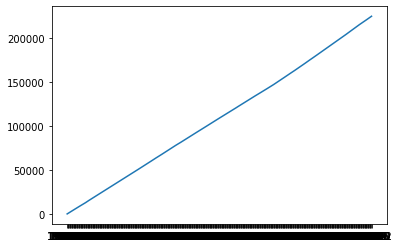

In [7]:
# Total unique fragments over time
plt.plot(build_month_increments(1980,2019), cum_frags)

### Cumulative Unique compounds

In [8]:
#Sticking with 1980-2019 for first pass at graph

network_stats = pd.read_csv("Data/NetworkStats/networkStats_byMonth.csv")
cum_cpds = list(network_stats[network_stats["month"] <= "2019-12"]["Cpd Nodes"])
print(cum_cpds)

[551235, 560688, 567358, 579361, 586594, 594382, 602796, 612182, 623289, 634161, 642029, 651932, 663377, 672749, 686442, 695723, 705310, 716475, 726587, 736886, 748222, 756656, 764055, 774789, 782305, 790002, 800093, 808708, 817659, 828859, 835019, 843928, 853010, 859875, 867677, 875016, 884529, 893070, 901704, 907550, 915443, 923124, 929069, 938764, 947975, 955937, 967339, 974567, 982104, 990101, 999279, 1009429, 1020157, 1028815, 1037717, 1048270, 1056798, 1067704, 1077397, 1086973, 1094906, 1102054, 1111340, 1122853, 1133707, 1142702, 1153622, 1165746, 1176993, 1189797, 1200463, 1210360, 1221238, 1230138, 1239473, 1250225, 1259312, 1269290, 1282947, 1292548, 1302295, 1311593, 1321792, 1332273, 1341154, 1349723, 1361281, 1371363, 1379694, 1390891, 1402689, 1411889, 1426080, 1435624, 1444409, 1452635, 1463404, 1470141, 1482211, 1491185, 1501058, 1513043, 1523889, 1536271, 1547366, 1557159, 1571658, 1580633, 1593401, 1604854, 1616184, 1629196, 1644698, 1656036, 1667420, 1682474, 169448

### Cumulative Patents

In [11]:
#Sticking with 1980-2019 for first pass at graph

patent_df = pd.read_csv("Data/NetworkStats/patent_stats_updatedv2.csv")
patent_subdf = patent_df[patent_df["month"] <= "2019-12"]
cum_patents = list(patent_subdf[patent_subdf["month"] >= "1980-01"]["total_patents"])
print(cum_patents)


[63376, 65190, 66988, 69094, 70891, 72680, 74596, 76309, 78433, 80822, 82865, 84952, 87276, 89312, 91669, 94247, 96593, 99005, 101228, 103397, 106192, 108627, 110970, 113602, 116178, 118231, 120896, 123268, 125777, 128607, 130840, 133156, 135647, 137845, 140166, 142501, 144949, 147446, 150308, 152505, 155128, 157699, 160111, 162824, 165584, 168385, 171306, 173663, 176333, 179221, 182347, 185172, 188318, 190969, 193612, 196486, 199254, 202630, 205341, 208197, 211221, 213663, 216352, 219774, 223281, 226303, 229778, 233166, 236273, 239919, 242877, 246028, 249616, 252433, 255385, 259263, 262477, 265513, 269248, 272575, 276097, 279577, 282801, 286485, 289786, 292186, 296040, 300005, 303635, 307150, 310809, 314016, 318338, 321795, 325127, 328390, 331979, 334915, 339117, 342658, 346188, 350338, 353785, 357901, 361716, 365326, 369824, 373242, 378618, 383496, 389707, 394056, 399169, 403679, 407650, 412754, 417187, 421922, 426468, 430555, 435961, 440403, 445420, 449839, 455448, 460122, 464352, 4

Text(0, 0.5, 'Cumulative Count')

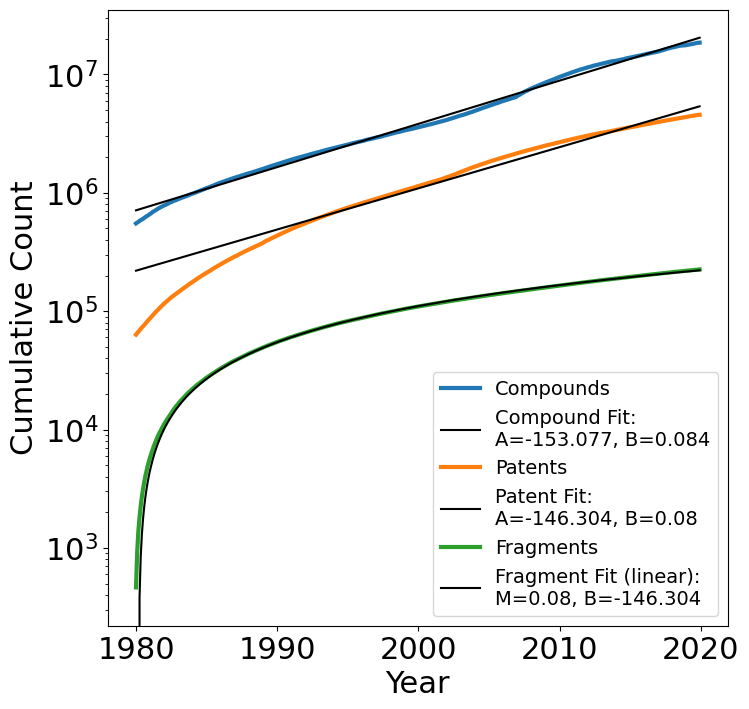

In [82]:
plt.subplots(figsize=(8,8))

xs = list(np.arange(1980, 2020, 1/12))

#y ~= exp(cpd_yfit) * exp(cpd_xfit * x)
cpd_xfit, cpd_yfit = np.polyfit(xs, np.log(cum_cpds), 1, w=np.sqrt(cum_cpds))
plt.plot(xs, cum_cpds, label="Compounds", linewidth=3)
plt.plot(xs,np.exp(cpd_yfit) * np.exp([cpd_xfit * x for x in xs]), color="k", label=f"Compound Fit: \nA={round(cpd_yfit, 3)}, B={round(cpd_xfit, 3)}")

patent_xfit, patent_yfit = np.polyfit(xs, np.log(cum_patents), 1, w=np.sqrt(cum_patents))
plt.plot(xs, cum_patents, label="Patents", linewidth=3)
plt.plot(xs,np.exp(patent_yfit) * np.exp([patent_xfit * x for x in xs]), color="k", label=f"Patent Fit: \nA={round(patent_yfit, 3)}, B={round(patent_xfit, 3)}")

frag_xfit, frag_yfit = np.polyfit(xs, cum_frags, 1)
plt.plot(xs, cum_frags, label="Fragments", linewidth=3)
plt.plot(xs,frag_yfit + [frag_xfit * x for x in xs], color="k", label=f"Fragment Fit (linear): \nM={round(patent_xfit, 3)}, B={round(patent_yfit, 3)}")


plt.legend(prop={"size":"14"})
plt.yscale("log")

plt.xlabel("Year")
plt.ylabel("Cumulative Count")

# Figure 1b

x-axis: Cumulative patents

y-axis: Counts of:
- compounds
- fragments

Text(0, 0.5, 'Cumulative Count')

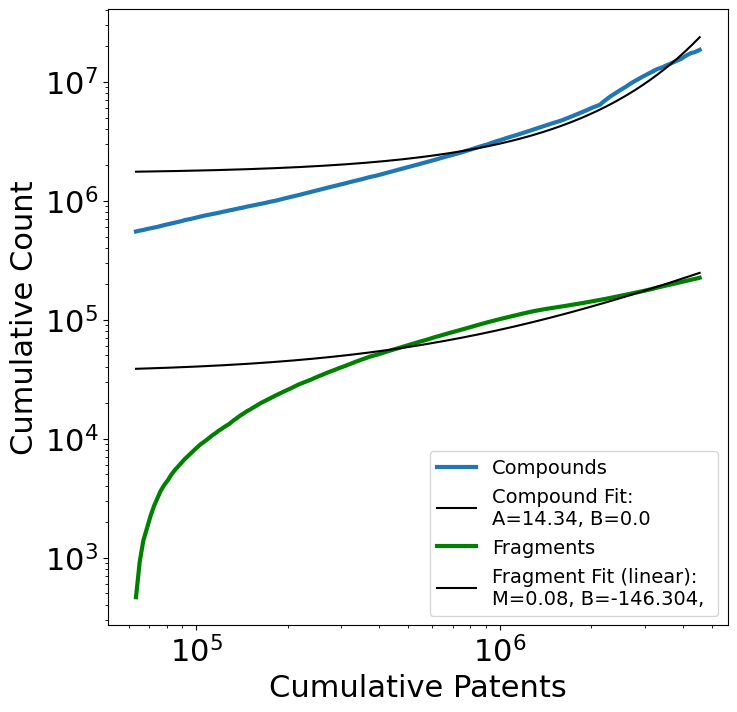

In [81]:
plt.subplots(figsize=(8,8))

cpd_xfit, cpd_yfit = np.polyfit(cum_patents, np.log(cum_cpds), 1, w=np.sqrt(cum_cpds))
plt.plot(cum_patents, cum_cpds, label="Compounds", linewidth=3)
plt.plot(cum_patents,np.exp(cpd_yfit) * np.exp([cpd_xfit * x for x in cum_patents]), color="k", label=f"Compound Fit: \nA={round(cpd_yfit, 3)}, B={round(cpd_xfit, 5)}")

frag_xfit, frag_yfit = np.polyfit(cum_patents, cum_frags, 1)
plt.plot(cum_patents, cum_frags, label="Fragments", linewidth=3, color="green")
plt.plot(cum_patents,frag_yfit + [frag_xfit * x for x in cum_patents], color="k", label=f"Fragment Fit (linear): \nM={round(patent_xfit, 3)}, B={round(patent_yfit, 3)}, ")


plt.legend(prop={"size":14})
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Cumulative Patents")
plt.ylabel("Cumulative Count")

## Figure 2

x-axis: cumulative fragments

y-axis: cumulative compounds

Inset: MA values over time

Eventually might have number of fragments per compound as a separate line (going off Figure 2 in "Sara Notes & Ideas")

In [17]:
MA_df_months = pd.read_csv("Data/AssemblyValues/MA_df_months_FULL.csv")
MA_df_months = MA_df_months.dropna()

In [18]:
print(MA_df_months)


     Unnamed: 0    month                                                MAs  \
0             0  1965-02                                       [17.0, 18.0]   
1             1  1965-05                                              [7.0]   
2             2  1965-06                                              [9.0]   
3             3  1966-03                                              [6.0]   
4             4  1966-07                                              [6.0]   
..          ...      ...                                                ...   
603         603  2022-08  [8.0, 6.0, 34.0, 37.0, 32.0, 31.0, 30.0, 33.0,...   
604         604  2022-09  [10.0, 31.0, 15.0, 25.0, 12.0, 29.0, 15.0, 16....   
605         605  2022-10  [9.0, 33.0, 12.0, 16.0, 39.0, 38.0, 47.0, 50.0...   
606         606  2022-11  [36.0, 36.0, 35.0, 14.0, 13.0, 11.0, 9.0, 32.0...   
607         607  2022-12  [24.0, 29.0, 17.0, 26.0, 10.0, 24.0, 19.0, 14....   

           avg      stdev   iqr        date  date_o

Text(0, 0.5, 'Cumulative Comopunds')

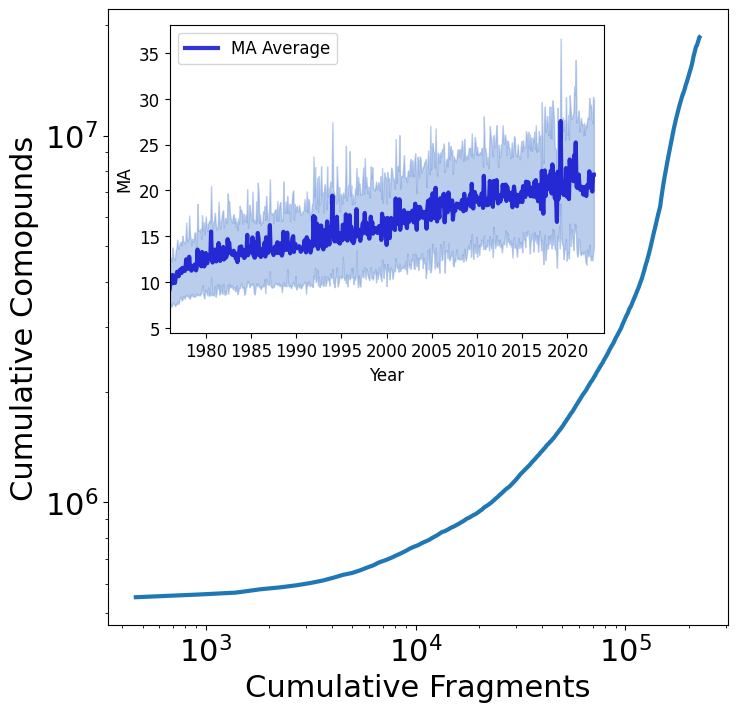

In [19]:
fig, ax = plt.subplots(figsize=(8,8))

#Comopunds as a function of fragments
ax.plot(cum_frags, cum_cpds, label="Compounds", linewidth=3)

#MA inset
axins = ax.inset_axes([0.1, 0.475, 0.7, 0.5])
axins.plot(list(pd.to_datetime(MA_df_months["date"])), MA_df_months["avg"],
                color="mediumblue", linewidth=3, markersize=10, alpha=0.8, label="MA Average")

axins.fill_between(list(pd.to_datetime(MA_df_months["date"])), MA_df_months["avg"] + MA_df_months["iqr"]/2, 
                MA_df_months["avg"] - MA_df_months["iqr"]/2, alpha=0.5, color="#799ddb")

axins.legend(loc="upper left", prop={"size":"12"})
axins.set_xlabel("Year", size=12)
axins.set_ylabel("MA", size=12)
axins.set_xlim(dt.date(1976,1,1), dt.date(2024,1,1))
axins.tick_params(axis='both', which='major', labelsize=12)
axins.tick_params(axis='both', which='minor', labelsize=12)

#plt.legend(loc="lower right")
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Cumulative Fragments")
plt.ylabel("Cumulative Comopunds")